# Diabetes Risk Prediction

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Data Cleaning & Preprocessing

In [3]:
# Shape and column types
print("Shape:", df.shape)
df.info()

Shape: (100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# Check for missing values
print('Missing values:')
df.isnull().sum()

Missing values:


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [7]:
# Drop "Other" gender if it’s rare
df = df[df['gender'] != 'Other']

### Encode Categorical Columns

In [8]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
le_smoking = LabelEncoder()

df['gender'] = le_gender.fit_transform(df['gender'])
df['smoking_history'] = le_smoking.fit_transform(df['smoking_history'])

### Outlier Detection

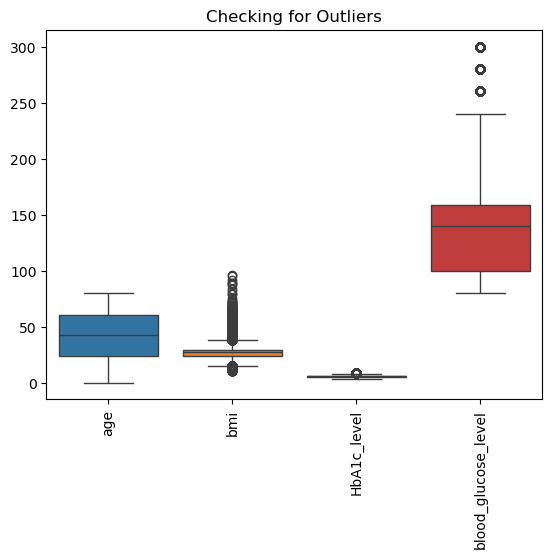

In [9]:
# Boxplot check
sns.boxplot(data=df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
plt.xticks(rotation=90)
plt.title('Checking for Outliers')
plt.show()

### Cap outliers 

In [10]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])
    return df

for col in ['bmi', 'blood_glucose_level', 'HbA1c_level']:
    df = cap_outliers(df, col)

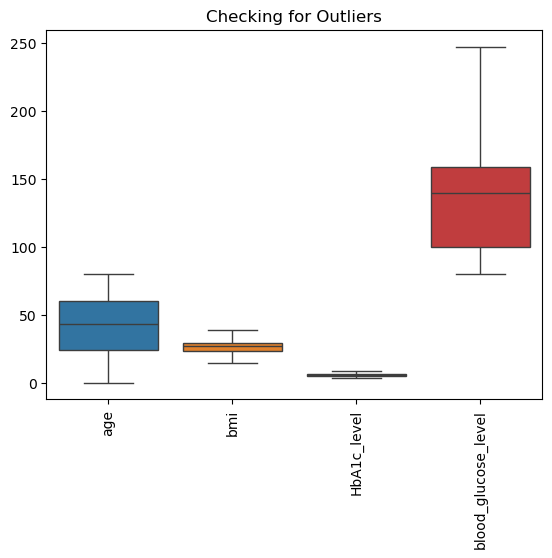

In [11]:
# Boxplot check
sns.boxplot(data=df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
plt.xticks(rotation=90)
plt.title('Checking for Outliers')
plt.show()

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

### EDA

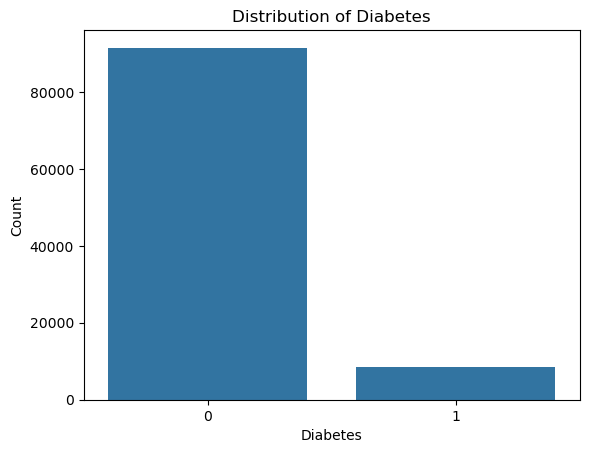

In [13]:
sns.countplot(x='diabetes', data=df)
plt.title("Distribution of Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

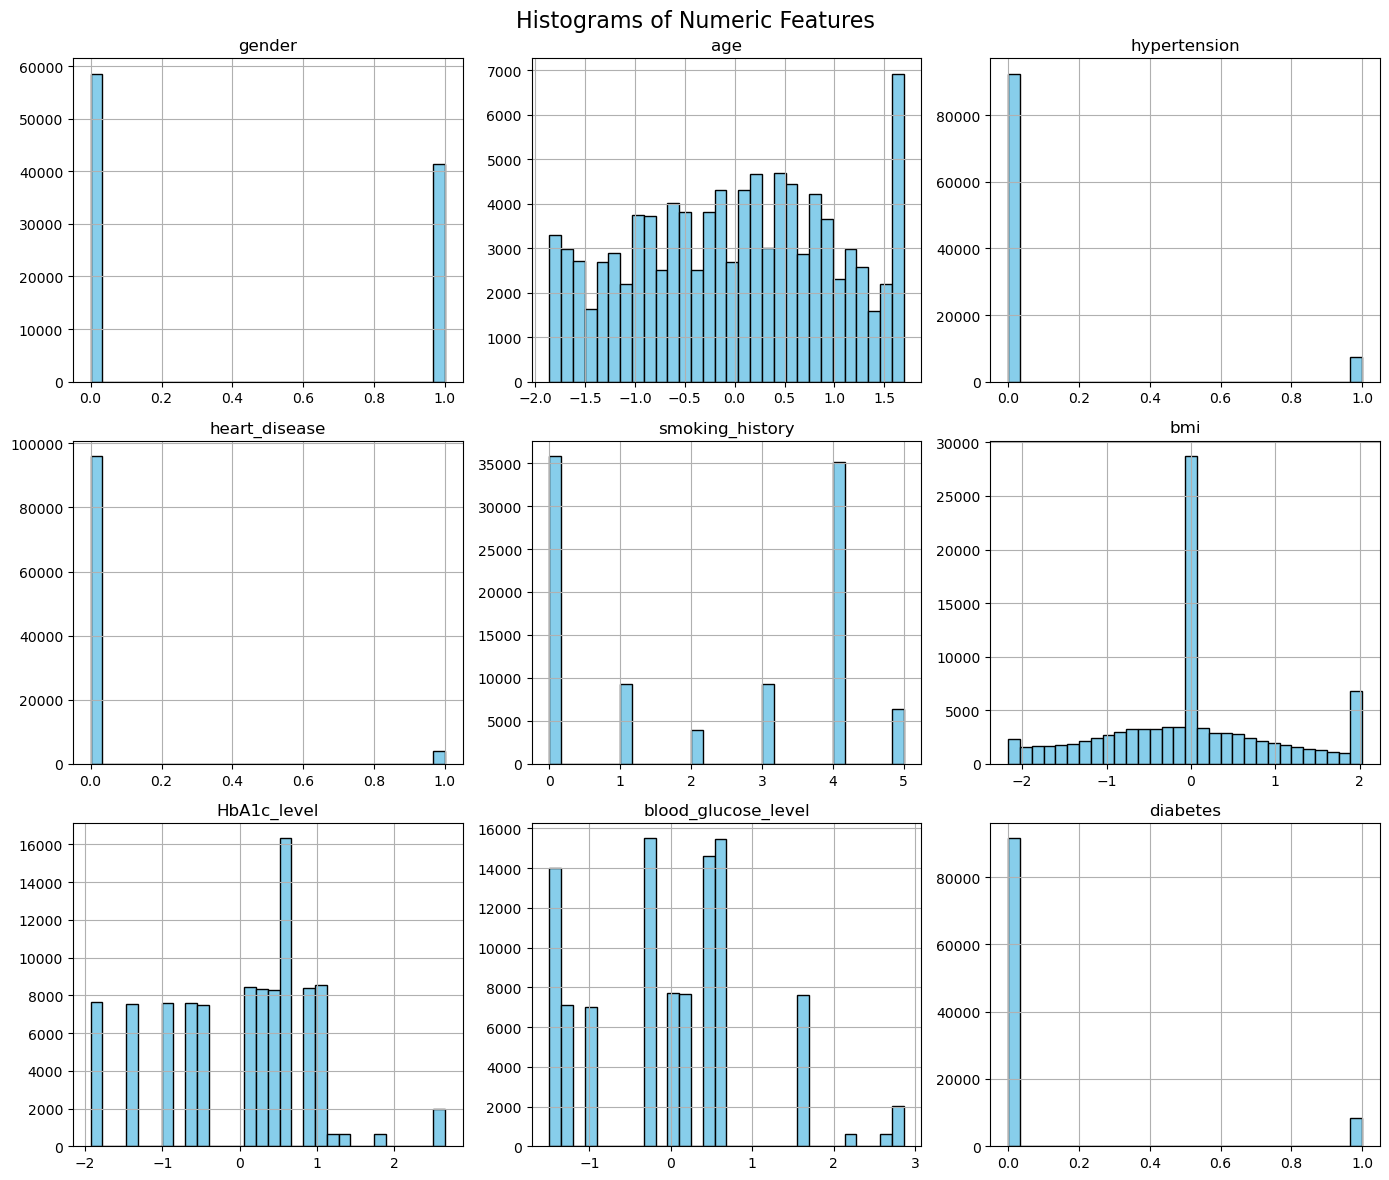

In [14]:
df.hist(figsize=(14, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

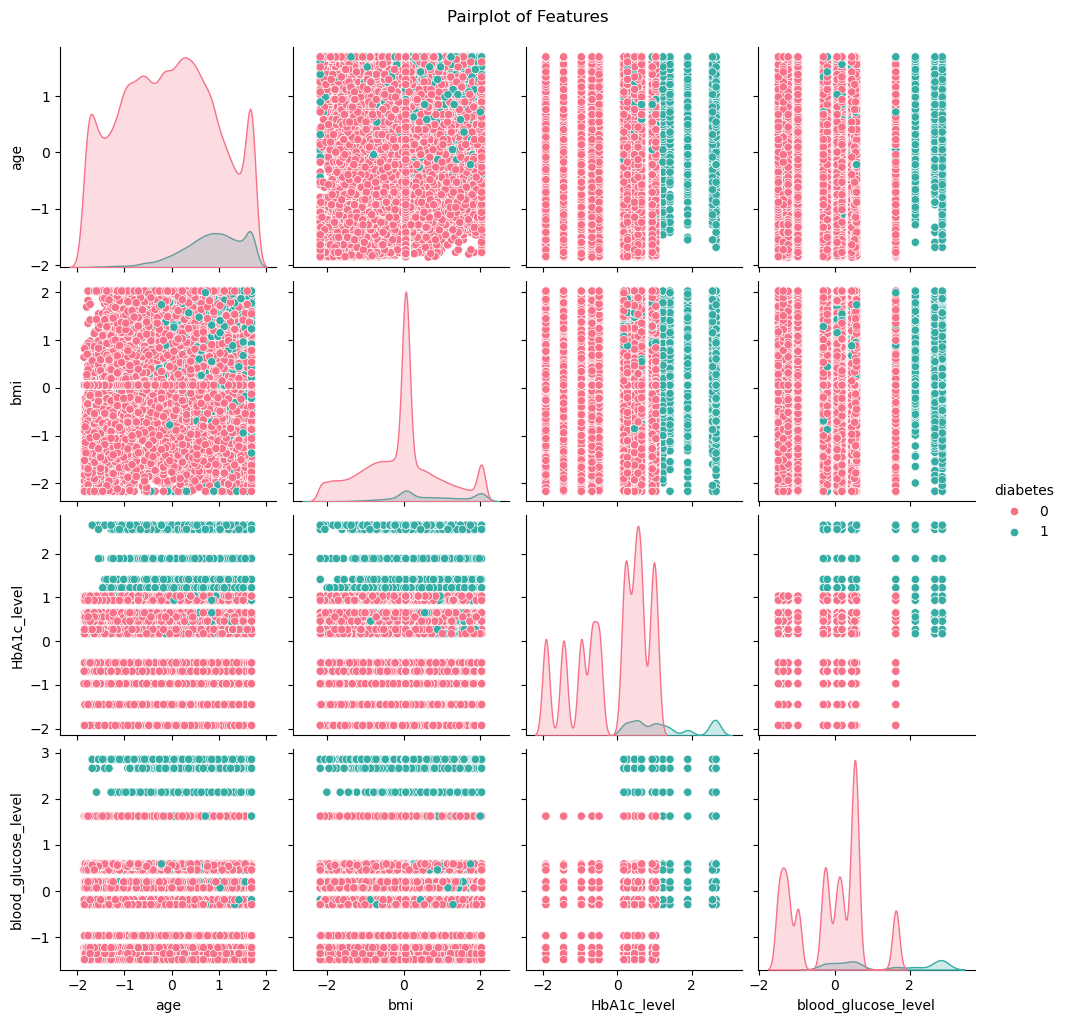

In [15]:
sns.pairplot(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']], hue='diabetes', palette='husl')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

### Correlation

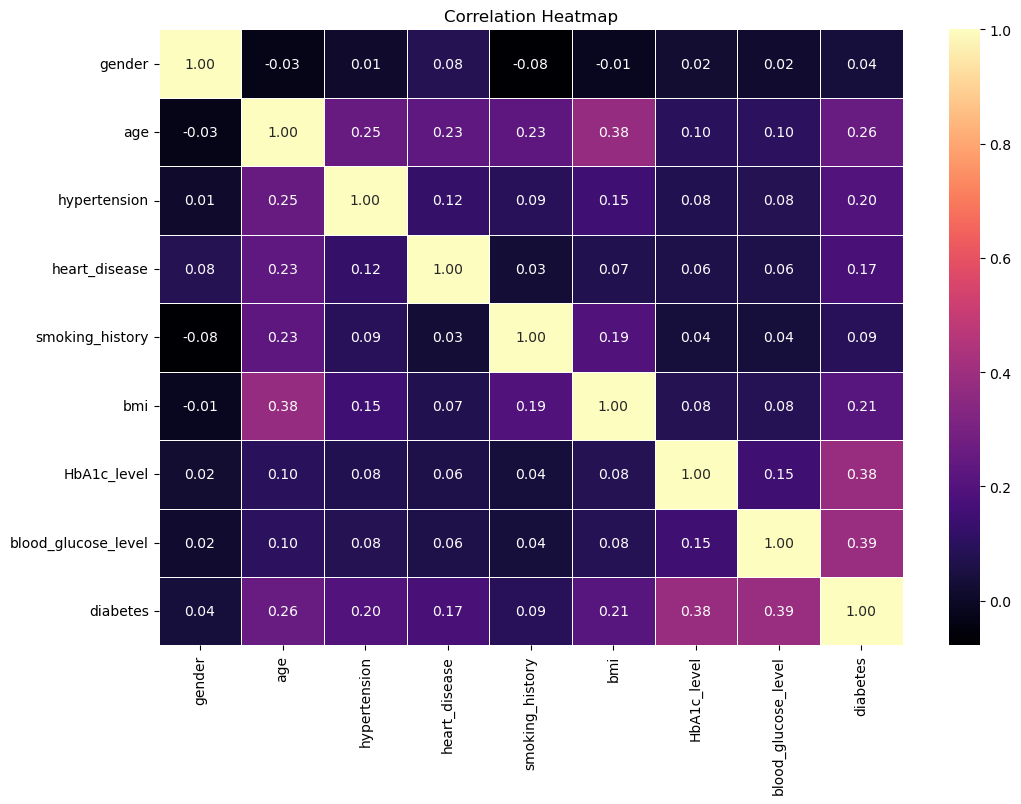

In [16]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
corr = df.corr(numeric_only=True).sort_values(by='diabetes', ascending=False)
print(corr['diabetes'])  

diabetes               1.000000
blood_glucose_level    0.386477
HbA1c_level            0.384789
age                    0.257999
bmi                    0.209684
hypertension           0.197811
heart_disease          0.171718
smoking_history        0.094328
gender                 0.037623
Name: diabetes, dtype: float64


In [47]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.692577,0,1,4,-0.317671,1.031170,0.067843,0
1,0,0.537899,0,0,0,0.057904,1.031170,-1.490304,0
2,1,-0.616779,0,0,4,0.057904,0.172144,0.535288,0
3,0,-0.261494,0,0,1,-0.624479,-0.495987,0.457380,0
4,1,1.514935,1,1,1,-1.208119,-0.686881,0.457380,0


### Split X & y

In [18]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

### Train/Test Split

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.9585437815672351
F1 Score: 0.7304065040650407
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18222
           1       0.86      0.63      0.73      1775

    accuracy                           0.96     19997
   macro avg       0.91      0.81      0.85     19997
weighted avg       0.96      0.96      0.96     19997



### K-Nearest Neighbors (KNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors
Accuracy: 0.9602440366054908
F1 Score: 0.7331319234642497
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18222
           1       0.91      0.62      0.73      1775

    accuracy                           0.96     19997
   macro avg       0.94      0.80      0.86     19997
weighted avg       0.96      0.96      0.96     19997



### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree
Accuracy: 0.9526929039355904
F1 Score: 0.7364902506963789
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18222
           1       0.73      0.74      0.74      1775

    accuracy                           0.95     19997
   macro avg       0.85      0.86      0.86     19997
weighted avg       0.95      0.95      0.95     19997



### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Accuracy: 0.9692453868080212
F1 Score: 0.798953906505394
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.95      0.69      0.80      1775

    accuracy                           0.97     19997
   macro avg       0.96      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997



### XGBoost

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost
Accuracy: 0.9699454918237735
F1 Score: 0.8024975353269799
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.96      0.69      0.80      1775

    accuracy                           0.97     19997
   macro avg       0.97      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997



### LightGBM

In [25]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

print("LightGBM")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("F1 Score:", f1_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 6725, number of negative: 73260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 79985, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084078 -> initscore=-2.388183
[LightGBM] [Info] Start training from score -2.388183
LightGBM
Accuracy: 0.9710456568485273
F1 Score: 0.8075772681954139
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.98      0.68      0.81      1775

    accuracy                           0.97     19997
   macro avg       0.98      0.84      0.90     19997
weighted avg       0.97      0.97      0.97     19997



### Support Vector Machine (SVM)

In [26]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine
Accuracy: 0.9617442616392459
F1 Score: 0.7255113024757803
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18222
           1       1.00      0.57      0.73      1775

    accuracy                           0.96     19997
   macro avg       0.98      0.78      0.85     19997
weighted avg       0.96      0.96      0.96     19997



### Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes
Accuracy: 0.9038855828374256
F1 Score: 0.5368674698795181
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     18222
           1       0.47      0.63      0.54      1775

    accuracy                           0.90     19997
   macro avg       0.72      0.78      0.74     19997
weighted avg       0.92      0.90      0.91     19997



### Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting
Accuracy: 0.9714957243586538
F1 Score: 0.809873248832555
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.99      0.68      0.81      1775

    accuracy                           0.97     19997
   macro avg       0.98      0.84      0.90     19997
weighted avg       0.97      0.97      0.97     19997



### CatBoost

In [29]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=0)  
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

print("CatBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("F1 Score:", f1_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

CatBoost
Accuracy: 0.9703955593339001
F1 Score: 0.8055190538764783
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.97      0.69      0.81      1775

    accuracy                           0.97     19997
   macro avg       0.97      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997



### Model performance data

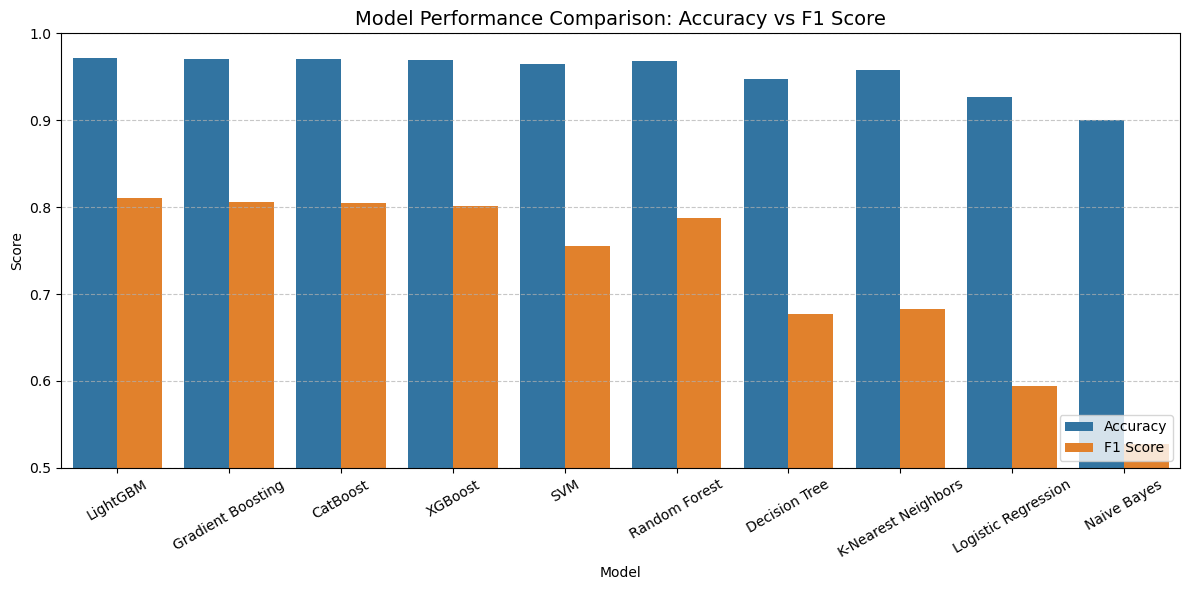

In [30]:
performance_data = {
    'Model': [
        'LightGBM', 'Gradient Boosting', 'CatBoost', 'XGBoost', 'SVM',
        'Random Forest', 'Decision Tree', 'K-Nearest Neighbors',
        'Logistic Regression', 'Naive Bayes'
    ],
    'Accuracy': [0.9713, 0.9710, 0.9702, 0.9698, 0.9650, 0.9683, 0.9473, 0.9573, 0.9267, 0.9001],
    'F1 Score': [0.8100, 0.8062, 0.8051, 0.8012, 0.7557, 0.7879, 0.6771, 0.6827, 0.5938, 0.5273]
}

df_perf = pd.DataFrame(performance_data)
df_melted = df_perf.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted)
plt.title('Model Performance Comparison: Accuracy vs F1 Score', fontsize=14)
plt.xticks(rotation=30)
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

### Confusion matrix

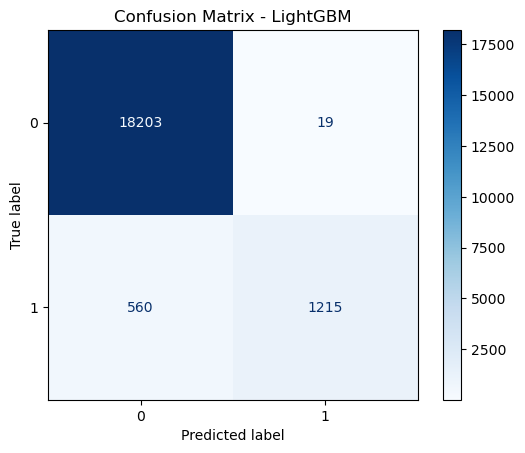

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_lgbm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - LightGBM")
plt.grid(False)
plt.show()

### Accuracy data

In [32]:
updated_performance_data = {
    'Model': [
        'LightGBM', 'Gradient Boosting', 'CatBoost', 'XGBoost',
        'Random Forest', 'SVM', 'Decision Tree',
        'K-Nearest Neighbors', 'Logistic Regression', 'Naive Bayes'
    ],
    'Accuracy': [0.9713, 0.9710, 0.9702, 0.9698, 0.9683, 0.9650, 0.9473, 0.9573, 0.9267, 0.9001],
    'F1 Score': [0.8100, 0.8062, 0.8051, 0.8012, 0.7879, 0.7557, 0.6771, 0.6827, 0.5938, 0.5273]
}

accuracy_df = pd.DataFrame(updated_performance_data)
accuracy_df

,Model,Accuracy,F1 Score
0,LightGBM,0.9713,0.8100
1,Gradient Boosting,0.9710,0.8062
2,CatBoost,0.9702,0.8051
3,XGBoost,0.9698,0.8012
4,Random Forest,0.9683,0.7879
5,SVM,0.9650,0.7557
6,Decision Tree,0.9473,0.6771
7,K-Nearest Neighbors,0.9573,0.6827
8,Logistic Regression,0.9267,0.5938
9,Naive Bayes,0.9001,0.5273


In [46]:
import joblib

# Assuming your model is `lgbm_model` and scaler is `scaler`
joblib.dump(lgbm_model, 'lgbm_model.pkl')  # Save the LGBM model
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler


['scaler.pkl']